Suppose you have time-series data consisting of (timestamp, user_id, country_id, site_id).
Each entry (row) is created when a user (of user_id) from some country (country_id) visited a certain website (site_id) at a certain time (timestamp).

We want to analyze this data.
You can find the data here:
https://docs.google.com/spreadsheets/d/1AV-A1uhQqvF6h0_a-fupFQIHv6W7-vNm88AYh_WzeB0/edit#gid=1326833441

For instance, in row 2 you will see the following row:
"2019-02-01 00:01:24	LC36FC	TL6	N0OTG"
This tells us that at "2019-02-01 00:01:24" user "LC36FC" from country "TL6" visited website "N0OTG".

The sheet contains 3554 rows (including the header) and four columns (ts for timestamp, user_id, country_id, site_id).

Using any programming/query language and free/commercial tools you like, answer the following questions. 
At the end, briefly describe how you computed the answers (and provide a link to code if any).

In [307]:
#start libraries 
import pandas as pd
import numpy as np 

In [308]:
#let's import and take a look at the data 
df = pd.read_csv('data_moloco.csv')
df

,ts,user_id,country_id,site_id
0,2019-02-01 00:01:24,LC36FC,TL6,N0OTG
1,2019-02-01 00:10:19,LC39B6,TL6,N0OTG
2,2019-02-01 00:21:50,LC3500,TL6,N0OTG
3,2019-02-01 00:22:50,LC374F,TL6,N0OTG
4,2019-02-01 00:23:44,LCC1C3,TL6,QGO3G
...,...,...,...,...
3548,2019-02-07 23:56:57,LC3F13,TL6,QGO3G
3549,2019-02-07 23:58:36,LC3842,HVQ,3POLC
3550,2019-02-07 23:58:56,LC35EB,TL6,QGO3G
3551,2019-02-07 23:59:19,LC3842,HVQ,3POLC


The data is composed of categorical variables only. Before we start answering the questions, let's just check if there are any NaNs in the dataset and the type of each column.

In [309]:
df.isna().mean().round(4) * 100

ts            0.0
user_id       0.0
country_id    0.0
site_id       0.0
dtype: float64

We have no missing data in the dataset. This is great, but we also need to check the dtype of each column. For instance, ts is the timestamp so we want pandas to understand it as time, so it will make our lives easier

In [310]:
pd.DataFrame(df.dtypes, columns=['Type'])

,Type
ts,object
user_id,object
country_id,object
site_id,object


We see that ```ts``` is defined as an object, not a date type. Let's convert it to a date type.

In [311]:
df['ts'] =pd.to_datetime(df['ts'], format="%Y-%m-%d %H:%M:%S")
pd.DataFrame(df.dtypes, columns=['Type'])

,Type
ts,datetime64[ns]
user_id,object
country_id,object
site_id,object


Now we are all set! Let's start answering the questions

### Q1: Consider only the rows with ```country_id = "BDV"``` (there are 844 such rows). For each ```site_id```, we can compute the number of unique user_id's found in these 844 rows. Which ```site_id``` has the largest number of unique users? And what's the number?

In [312]:
#extract only country_id = "BDV"
df_bdv = df[df.country_id == 'BDV']
df_bdv

,ts,user_id,country_id,site_id
13,2019-02-01 00:47:58,LC3C22,BDV,N0OTG
32,2019-02-01 02:46:15,LC375A,BDV,5NPAU
87,2019-02-01 06:44:42,LC392E,BDV,N0OTG
88,2019-02-01 07:36:56,LC3FAE,BDV,5NPAU
94,2019-02-01 08:58:35,LC3AFF,BDV,3POLC
...,...,...,...,...
3521,2019-02-07 22:18:59,LC3ECF,BDV,5NPAU
3525,2019-02-07 22:26:28,LC3D63,BDV,5NPAU
3526,2019-02-07 22:27:29,LC3005,BDV,5NPAU
3530,2019-02-07 22:57:34,LC3C51,BDV,5NPAU


Now we check the number of unique user per ```site_id```

In [313]:
df_bdv.groupby('site_id').user_id.nunique()

site_id
3POLC      2
5NPAU    544
N0OTG     90
Name: user_id, dtype: int64

Therefore, 5NPAU has the highest number of unique users (544).

### Q2: Between 2019-02-03 00:00:00 and 2019-02-04 23:59:59, there are four users who visited a certain site more than 10 times. Find these four users & which sites they (each) visited more than 10 times. (Simply provides four triples in the form (user_id, site_id, number of visits) in the box below.)

In [314]:
#let's get separate only the chunk of data we need 
df_datesplit = df.set_index(df['ts']) #set the ts as the index
df_datesplit= df_datesplit.drop(['ts'], axis=1) #drop ts so we don't have a duplicate
df_datesplit = df_datesplit['2019-02-03 00:00:00 ':'2019-02-04 23:59:59'] #get only the chunk of data we need
df_datesplit

,user_id,country_id,site_id
ts,,,
2019-02-03 00:02:31,LC3C7E,TL6,3POLC
2019-02-03 00:03:09,LC3C7E,TL6,3POLC
2019-02-03 00:03:46,LC3C7E,TL6,3POLC
2019-02-03 00:04:12,LC3C7E,TL6,3POLC
2019-02-03 00:04:25,LC3C7E,TL6,3POLC
...,...,...,...
2019-02-04 23:54:56,LC34B0,XA7,N0OTG
2019-02-04 23:55:46,LC3DEA,TL6,N0OTG
2019-02-04 23:56:12,LC06C3,TL6,N0OTG


Considering that the ```country_id``` where the users accessed does not matter, one way of solving this problem easily is using counter. Counter is dictionary subclass for counting hashable objects. 

In [315]:
from collections import Counter

count = Counter(list(zip(df_datesplit.user_id, df_datesplit.site_id)))
for i,j in count.items():
    if j>=10:
        print(i,j)

('LC3C7E', '3POLC') 15
('LC3A59', 'N0OTG') 26
('LC06C3', 'N0OTG') 25
('LC3C9D', 'N0OTG') 17


### Q3: For each site, compute the unique number of users whose last visit (found in the original data set) was to that site. For instance, user "LC3561"'s last visit is to "N0OTG" based on timestamp data. Based on this measure, what are top three sites? (hint: site "3POLC" is ranked at 5th with 28 users whose last visit in the data set was to 3POLC; simply provide three pairs in the form (site_id, number of users).)

First, we will create a dataframe that will return us the recent visit per user

In [316]:
most_recent = df.sort_values(
             by='ts', ascending=False).groupby('user_id')['ts'].apply(list).apply(pd.Series).reset_index()

# truncate and rename columns
most_recent = most_recent[['user_id', 0]]
most_recent.columns = ['user_id', 'ts']

#sort by date and check it 
most_recent.sort_values(by='ts')
most_recent

,user_id,ts
0,LC00C3,2019-02-03 18:52:50
1,LC01C3,2019-02-04 11:35:10
2,LC05C3,2019-02-02 14:14:44
3,LC06C3,2019-02-07 01:16:12
4,LC07C3,2019-02-05 19:06:42
...,...,...
1911,LCFC3B,2019-02-05 04:53:03
1912,LCFC3D,2019-02-01 18:59:50
1913,LCFC3E,2019-02-01 20:49:13
1914,LCFEC3,2019-02-07 06:23:59


Now that we have the most recent visit by user, we join (merge in pandas language) the original dataframe with the one we created on ```ts``` and ```user_id```

In [317]:
recent_visits = df.merge(most_recent, on=['ts', 'user_id'])


Now all we have to do is group by unique websites and count it 

In [318]:
result = recent_visits.groupby('site_id').count().sort_values(by="user_id",ascending=False)
result

,ts,user_id,country_id
site_id,,,
5NPAU,992,992,992
N0OTG,561,561,561
QGO3G,289,289,289
GVOFK,42,42,42
3POLC,28,28,28
RT9Z6,2,2,2
EUZ/Q,1,1,1
JSUUP,1,1,1


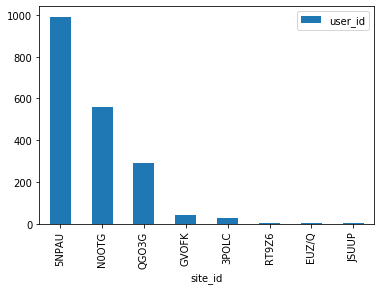

In [319]:
result.plot.bar(y='user_id', use_index=True);

We see that 5NPAU,N0OTG, and QGO3G are the websites with the biggest number of last visits, with 992, 561, and 289 accesses respectively.

### Q4: For each user, determine the first site he/she visited and the last site he/she visited based on the timestamp data. Compute the number of users whose first/last visits are to the same website. What is the number?

Following a similar line of thought from Q3, we will first get when the user was first and last seen, then we will join the data frame on ```user_id``` and ```site_id```.

In [320]:
first_seen = df.groupby('user_id').first()
last_seen = df.groupby('user_id').last()

df_result = first_seen.merge(last_seen, on=['user_id','site_id'],how='inner')
df_result

,ts_x,country_id_x,site_id,ts_y,country_id_y
user_id,,,,,
LC00C3,2019-02-03 18:52:50,QLT,5NPAU,2019-02-03 18:52:50,QLT
LC01C3,2019-02-04 11:35:10,QLT,5NPAU,2019-02-04 11:35:10,QLT
LC05C3,2019-02-02 14:14:44,BDV,5NPAU,2019-02-02 14:14:44,BDV
LC06C3,2019-02-01 22:49:39,TL6,N0OTG,2019-02-07 01:16:12,TL6
LC07C3,2019-02-05 19:06:42,BDV,5NPAU,2019-02-05 19:06:42,BDV
...,...,...,...,...,...
LCFC38,2019-02-02 13:58:18,BDV,5NPAU,2019-02-02 13:58:18,BDV
LCFC3B,2019-02-05 04:53:03,TL6,N0OTG,2019-02-05 04:53:03,TL6
LCFC3D,2019-02-01 18:59:50,TL6,N0OTG,2019-02-01 18:59:50,TL6


In [321]:
s = 'The number of users whose first/last visits are to the same website is: ' + repr(len(df_result))
print(s)

The number of users whose first/last visits are to the same website is: 1670
